https://github.com/nachi-hebbar/Transfer-Learning-ResNet-Keras/blob/main/ResNet_50.ipynb

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam,SGD
import os 
import PIL


In [26]:
tensorflow.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [27]:
import pathlib
data_dir="C://Users//Chinmayee//Desktop//DL//caltech-101//caltech-101//ObjectCategories"
data_dir=pathlib.Path(data_dir)
print(data_dir)


C:\Users\Chinmayee\Desktop\DL\caltech-101\caltech-101\ObjectCategories


In [83]:
img_height,img_width=224,224
batch_size=16
train_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  label_mode="categorical",
  seed=123,
  shuffle=False,
  image_size=(img_height, img_width),
  batch_size=batch_size)
     

Found 9144 files belonging to 102 classes.
Using 7316 files for training.


In [84]:
class_names = train_ds.class_names
print(class_names)
print(len(class_names))
print(class_names[56])

['BACKGROUND_Google', 'Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'accordion', 'airplanes', 'anchor', 'ant', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'scissors', 'scorpion', 'sea_horse', 'snoopy', 's

In [85]:
val_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  label_mode="categorical",
  shuffle=False,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  class_names=class_names)

Found 9144 files belonging to 102 classes.
Using 1828 files for validation.


['BACKGROUND_Google', 'Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'accordion', 'airplanes', 'anchor', 'ant', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'scissors', 'scorpion', 'sea_horse', 'snoopy', 's

AttributeError: '_PrefetchDataset' object has no attribute 'labels'

tf.Tensor(
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.], shape=(102,), dtype=float32)
0
BACKGROUND_Google


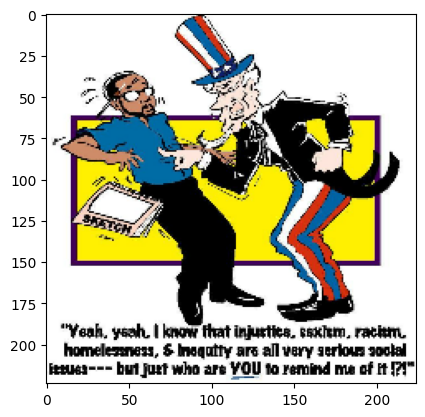

In [86]:
# import matplotlib.pyplot as plt



    

for images, labels in train_ds.take(1):
#   for i in range(6):

    plt.imshow(images[1].numpy().astype("uint8"))
    print(labels[1])
    class_index = labels[1].numpy().argmax()
    print(class_index)    # Get the class name using the index
    class_name = class_names[class_index]
    print(class_name)
#     plt.axis("off"
# 
# 



In [32]:
from keras.applications. vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras import Model

In [33]:
# def add_new_last_layer(base_model, nb_classes):
#     x = base_model.output
#     x = GlobalAveragePooling2D()(x)
#     x = Dense(512, activation='relu')(x)
#     predictions = Dense(nb_classes, activation='softmax')(x)
#     model = Model(inputs=base_model.input, outputs =predictions)
   
#     return model

In [34]:
# base_model = ResNet50(weights='imagenet', include_top=False) #include_top=False excludes final FC layer
# model = add_new_last_layer(base_model, 102)

In [45]:
resnet_model = Sequential()

pretrained_model= tensorflow.keras.applications.MobileNet(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=102,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(102, activation='softmax'))

In [46]:
resnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 1024)              3228864   
 onal)                                                           
                                                                 
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dense_7 (Dense)             (None, 102)               52326     
                                                                 
Total params: 3805990 (14.52 MB)
Trainable params: 577126 (2.20 MB)
Non-trainable params: 3228864 (12.32 MB)
_________________________________________________________________


In [42]:
pretrained_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

In [47]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [50]:
epochs=1
history = resnet_model.fit(
  train_ds,
  
  validation_data=(val_ds),
  epochs=epochs,
  batch_size=16
)

458/458 [==============================] - 309s 675ms/step - loss: 1.7309 - accuracy: 0.5802 - val_loss: 1.6842 - val_accuracy: 0.5914


In [100]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

115/115 [==============================] - 62s 535ms/step


In [104]:

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
image_path = 'C://Users//Chinmayee//Desktop//DL//LP-IV-datasets//LP-IV-datasets//Object Detection(Ass6)//caltech-101-img//accordion//image_0001.jpg'  # Replace with the path to your image
img = image.load_img(image_path, target_size=(224, 224))

# Convert the image to a NumPy array
img_array = image.img_to_array(img)

# Expand the dimensions to create a batch of size 1
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the input image
img_array = preprocess_input(img_array)

1/1 [==============================] - 0s 104ms/step
[[2.52142083e-02 1.71790507e-05 2.72762986e-06 1.96766065e-04
  7.73791999e-06 1.76099211e-01 1.63379038e-04 3.02484818e-02
  2.70720888e-02 2.01595016e-03 3.52421170e-03 8.07852542e-04
  1.12401647e-02 1.65325252e-03 9.29124726e-05 9.36845690e-03
  4.73173772e-04 4.01240122e-03 2.98879255e-04 1.41503592e-03
  1.10430047e-02 9.21155885e-03 6.02966547e-02 5.04122768e-03
  3.32288415e-04 1.45214944e-04 1.31988025e-04 6.53298048e-04
  5.47549129e-03 2.69455399e-04 7.57139700e-04 4.29466018e-04
  2.30847527e-05 5.59279055e-04 2.22186907e-03 6.89778198e-03
  3.86923142e-02 3.40177823e-04 1.88478758e-03 1.39418775e-02
  1.21204292e-04 1.35308350e-04 5.81732893e-04 4.20990778e-04
  1.30737651e-04 1.21659177e-04 6.84474269e-03 9.91487801e-02
  8.25609532e-05 6.50761649e-04 1.56688999e-04 2.59554293e-03
  1.91349769e-03 3.02690867e-04 2.48429569e-04 2.06001708e-03
  4.89818677e-03 9.27786459e-04 3.30566242e-02 4.55280271e-04
  6.77733915e-03 

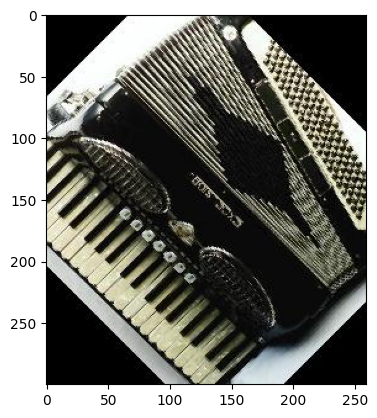

In [108]:
pred=resnet_model.predict(img_array)
print(pred)

output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

img = Image.open(image_path)
plt.imshow(img)

In [ ]:
#actual prediction compare